In [1]:
%pip install SciencePlots
from functools import reduce

from statistics import mean, stdev, mode, quantiles
import matplotlib.pyplot as plt
plt.style.use(['science','ieee'])
from decimal import Decimal
import re
import pandas as pd
from os import walk
import numpy as np
import matplotlib
import os



import matplotlib.pyplot as plt



Note: you may need to restart the kernel to use updated packages.


In [2]:
# /usr/bin/env TS_NODE_PROJECT=tsconfig.json 'OFF-HFC_LOGGING={"debug":"console","info":"console"}' 'NODE_OPTIONS=--require /home/rafaelapb/.vscode-server-insiders/bin/4589815e4849499c67125ff68563fa102646b869/extensions/ms-vscode.js-debug/src/bootloader.bundle.js --inspect-publish-uid=http' 'VSCODE_INSPECTOR_OPTIONS={"inspectorIpc":"/tmp/node-cdp.33739-1.sock","deferredMode":false,"waitForDebugger":"","execPath":"/home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node","onlyEntrypoint":false,"autoAttachMode":"always","mandatePortTracking":true,"fileCallback":"/tmp/node-debug-callback-10ce8a101bff4e7a"}' /home/rafaelapb/.nvm/versions/node/v16.14.0/bin/node --require ts-node/register --async-stack-traces packages/cactus-plugin-cc-tx-visualization/src/test/typescript/integration/cctxviz-persist-cross-chain-log.test.ts > packages/cactus-plugin-cc-tx-visualization/src/test/typescript/csv/out.txt
path = os.getcwd()
parent = os.path.dirname(path)
print(parent)
test_result_path = parent + "/test-results/"
NUMBER_TESTS = 30

import sys

if __name__ == '__main__':
    print(sys.argv)
    print(test_result_path)



#(.)*-dummy-\d+.out captures:
# cctxviz-generate-use-case-dummy-1.out and cctxviz-generate-use-case-dummy-58.out

#(.)*-dummy-\d+-events-\d+.out captures
#cctxviz-generate-use-case-dummy-60-events-1.out and cctxviz-generate-use-case-dummy-60-events-97.out
def get_all_files(path,regex):
    filenames = []
    for _, _, filenames in sorted(walk(path)):
        break
    #regex all out: .*\.out
    # for dummy use case: (.)*-dummy-\d.out
    filenames = [i for i in filenames if re.match(regex, i)]
    return filenames

def exists (element):
    if (element):
        return True
    else:
        return False


/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main
['/home/rafaelapb/.local/lib/python3.8/site-packages/ipykernel_launcher.py', '--ip=127.0.0.1', '--stdin=9008', '--control=9006', '--hb=9005', '--Session.signature_scheme="hmac-sha256"', '--Session.key=b"889b6414-dab5-4a7c-a5ee-985f0ed14311"', '--shell=9007', '--transport="tcp"', '--iopub=9009', '--f=/home/rafaelapb/.local/share/jupyter/runtime/kernel-v2-1708OOvZ9loLWfqw.json']
/home/rbelchior/blockchain-integration-framework/packages/cactus-plugin-cc-tx-visualization/src/main/test-results/


In [3]:
### 6 EVENTS

files = get_all_files(test_result_path, "dummy-use-case-6-(.)*-\d+.out")
TEST_SETS = 4
entries = len(files) / 2
print(f"found {len(files)} matches for dummy-use-case-6-(.)*-\d+.out")
metric_dict = dict()


for file in files:
    file_path = test_result_path + file
    #print (f"opening {file_path}\n")
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        #already defined
        if metric_dict.get(key):
            metric_dict[key].append(value)
        else: 
            metric_dict[key] = [value]

#print("the metric dictionary is")
#print(metric_dict)
reduced_metric_dict = dict()
#print(metric_dict.values())
#reduced_metric_dict = reduce(lambda x, list: x + mean(list), metric_dict.values(),0)       

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict:
        metric_dict[element] = metric_dict[element][TO_SKIP_EACH_SIDE:]
        metric_dict[element] = metric_dict[element][:len(metric_dict[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict:
    data_container = {
        "mean": round(mean(map(lambda x: float(x), metric_dict[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict[element])),
        "events": 6,
    }
    reduced_metric_dict[element] = data_container
print(reduced_metric_dict)
#print(reduced_metric_dict['EVAL-testFile-SETUP-INFRA']['mean'])



    



found 100 matches for dummy-use-case-6-(.)*-\d+.out
{'EVAL-ccModel-DUMMY': {'mean': 83.51, 'stdev': 1.95, 'mode': 83.18, 'quantiles': [82.08500000000001, 83.06, 84.05000000000001], 'events': 6}, 'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': {'mean': 1391.6, 'stdev': 83.03, 'mode': 1358.0, 'quantiles': [1357.75, 1370.5, 1403.0], 'events': 6}, 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': {'mean': 1.43, 'stdev': 0.57, 'mode': 1.0, 'quantiles': [1.0, 1.0, 2.0], 'events': 6}, 'EVAL-testFile-SETUP-INFRA': {'mean': 1397.53, 'stdev': 83.06, 'mode': 1363.0, 'quantiles': [1363.0, 1377.5, 1408.25], 'events': 6}, 'EVAL-testFile-SEND-MESSAGES': {'mean': 0.47, 'stdev': 0.51, 'mode': 0.0, 'quantiles': [0.0, 0.0, 1.0], 'events': 6}, 'EVAL-testFile-POLL': {'mean': 3030.27, 'stdev': 8.94, 'mode': 3026.0, 'quantiles': [3026.0, 3028.5, 3031.0], 'events': 6}, 'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': {'mean': 0.7, 'stdev': 0.53, 'mode': 1.0, 'quantiles': [0.0, 1.0, 1.0], 'events': 6}, 'EVAL-plugin-cc-

In [4]:
### 600 EVENTS

files = get_all_files(test_result_path, "dummy-use-case-600-(.)*-\d+.out")
TEST_SETS = 4
entries = len(files) / 2
print(f"found {len(files)} matches for dummy-use-case-600-(.)*-\d+.out")
metric_dict_600 = dict()


for file in files:
    file_path = test_result_path + file
    #print (f"opening {file_path}\n")
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        #already defined
        if metric_dict_600.get(key):
            metric_dict_600[key].append(value)
        else: 
            metric_dict_600[key] = [value]

#print("the metric dictionary is")
#print(metric_dict)
reduced_metric_dict_600 = dict()
#print(metric_dict.values())
#reduced_metric_dict = reduce(lambda x, list: x + mean(list), metric_dict.values(),0)       

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict_600:
        metric_dict_600[element] = metric_dict_600[element][TO_SKIP_EACH_SIDE:]
        metric_dict_600[element] = metric_dict_600[element][:len(metric_dict_600[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict_600:
    data_container = {
        "mean": round(mean(map(lambda x: float(x), metric_dict_600[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict_600[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict_600[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict_600[element])),
        "events": 600,
    }
    reduced_metric_dict_600[element] = data_container
print(reduced_metric_dict_600)
#print(reduced_metric_dict['EVAL-testFile-SETUP-INFRA']['mean'])



    



found 100 matches for dummy-use-case-600-(.)*-\d+.out
{'EVAL-ccModel-DUMMY': {'mean': 98.21, 'stdev': 1.51, 'mode': 96.86, 'quantiles': [96.86, 97.96000000000001, 98.91250000000001], 'events': 600}, 'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': {'mean': 1382.6, 'stdev': 22.37, 'mode': 1384.0, 'quantiles': [1366.25, 1382.5, 1395.25], 'events': 600}, 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': {'mean': 1.53, 'stdev': 0.51, 'mode': 2.0, 'quantiles': [1.0, 2.0, 2.0], 'events': 600}, 'EVAL-testFile-SETUP-INFRA': {'mean': 1388.33, 'stdev': 22.26, 'mode': 1390.0, 'quantiles': [1371.75, 1388.0, 1399.75], 'events': 600}, 'EVAL-testFile-SEND-MESSAGES': {'mean': 13.03, 'stdev': 3.02, 'mode': 11.0, 'quantiles': [11.0, 11.5, 15.0], 'events': 600}, 'EVAL-testFile-POLL': {'mean': 3163.47, 'stdev': 21.89, 'mode': 3156.0, 'quantiles': [3153.0, 3156.0, 3164.25], 'events': 600}, 'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': {'mean': 19.87, 'stdev': 6.03, 'mode': 17.0, 'quantiles': [17.0, 18.0, 20.25], 

In [5]:
### 6000 EVENTS

files = get_all_files(test_result_path, "dummy-use-case-6000-(.)*-\d+.out")
TEST_SETS = 4
entries = len(files) / 2
print(f"found {len(files)} matches for dummy-use-case-6000-(.)*-\d+.out")
metric_dict_6000 = dict()


for file in files:
    file_path = test_result_path + file
    #print (f"opening {file_path}\n")
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        #already defined
        if metric_dict_6000.get(key):
            metric_dict_6000[key].append(value)
        else: 
            metric_dict_6000[key] = [value]

#print("the metric dictionary is")
#print(metric_dict_6000)
reduced_metric_dict_6000 = dict()
#print(metric_dict_6000.values())
#reduced_metric_dict_6000 = reduce(lambda x, list: x + mean(list), metric_dict_6000.values(),0)       

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict_6000:
        metric_dict_6000[element] = metric_dict_6000[element][TO_SKIP_EACH_SIDE:]
        metric_dict_6000[element] = metric_dict_6000[element][:len(metric_dict_6000[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict_6000:
    data_container = {
        "mean": round(mean(map(lambda x: float(x), metric_dict_6000[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict_6000[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict_6000[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict_6000[element])),
        "events": 6000,
    }
    reduced_metric_dict_6000[element] = data_container
print(reduced_metric_dict_6000)
#print(reduced_metric_dict_6000['EVAL-testFile-SETUP-INFRA']['mean'])



    



found 100 matches for dummy-use-case-6000-(.)*-\d+.out
{'EVAL-ccModel-DUMMY': {'mean': 265.88, 'stdev': 3.88, 'mode': 265.6, 'quantiles': [263.4975, 264.66499999999996, 268.52], 'events': 6000}, 'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': {'mean': 1386.33, 'stdev': 18.28, 'mode': 1412.0, 'quantiles': [1371.75, 1384.5, 1404.75], 'events': 6000}, 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': {'mean': 1.3, 'stdev': 0.47, 'mode': 1.0, 'quantiles': [1.0, 1.0, 2.0], 'events': 6000}, 'EVAL-testFile-SETUP-INFRA': {'mean': 1392.2, 'stdev': 18.05, 'mode': 1388.0, 'quantiles': [1377.0, 1390.0, 1410.5], 'events': 6000}, 'EVAL-testFile-SEND-MESSAGES': {'mean': 116.97, 'stdev': 20.67, 'mode': 107.0, 'quantiles': [104.0, 107.0, 122.0], 'events': 6000}, 'EVAL-testFile-POLL': {'mean': 3459.37, 'stdev': 18.36, 'mode': 3454.0, 'quantiles': [3447.0, 3454.0, 3467.5], 'events': 6000}, 'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': {'mean': 87.9, 'stdev': 6.32, 'mode': 82.0, 'quantiles': [82.75, 87.0, 92.0]

In [6]:
### 60 EVENTS

files = get_all_files(test_result_path, "dummy-use-case-60-(.)*-\d+.out")
TEST_SETS = 4
entries = len(files) / 2
print(f"found {len(files)} matches for dummy-use-case-60-(.)*-\d+.out")
metric_dict_60 = dict()


for file in files:
    file_path = test_result_path + file
    #print (f"opening {file_path}\n")
    f = open(file_path)
    regex = "(EVAL-.*):*"


    matches = filter(exists,[re.findall(regex, line) for line in f])
    for i in matches:
        expression = i[0].split(":")
        key = expression[0]
        value = expression[1]
        #already defined
        if metric_dict_60.get(key):
            metric_dict_60[key].append(value)
        else: 
            metric_dict_60[key] = [value]

#print("the metric dictionary is")
#print(metric_dict)
reduced_metric_dict_60 = dict()
#print(metric_dict.values())
#reduced_metric_dict = reduce(lambda x, list: x + mean(list), metric_dict.values(),0)       

TO_SKIP_EACH_SIDE = 10
# remove X first and last entries
# we are only counting X-20 entries
if entries > TO_SKIP_EACH_SIDE:
    for element in metric_dict_60:
        metric_dict_60[element] = metric_dict_60[element][TO_SKIP_EACH_SIDE:]
        metric_dict_60[element] = metric_dict_60[element][:len(metric_dict_60[element])-TO_SKIP_EACH_SIDE]


for element in metric_dict_60:
    data_container = {
        "mean": round(mean(map(lambda x: float(x), metric_dict_60[element])),2),
        "stdev": round(stdev(map(lambda x: float(x), metric_dict_60[element])),2),
        "mode": mode(map(lambda x: float(x), metric_dict_60[element])),
        "quantiles": quantiles(map(lambda x: float(x), metric_dict_60[element])),
        "events": 60,
    }
    reduced_metric_dict_60[element] = data_container
print(reduced_metric_dict_60)
#print(reduced_metric_dict['EVAL-testFile-SETUP-INFRA']['mean'])



    



found 100 matches for dummy-use-case-60-(.)*-\d+.out
{'EVAL-SETUP-INIT-RABBIT-MQ-SERVER': {'mean': 1382.0, 'stdev': 20.99, 'mode': 1365.0, 'quantiles': [1365.0, 1382.5, 1400.5], 'events': 60}, 'EVAL-plugin-cc-tx-visualization-SETUP-CONSTRUCTOR': {'mean': 1.53, 'stdev': 0.51, 'mode': 2.0, 'quantiles': [1.0, 2.0, 2.0], 'events': 60}, 'EVAL-testFile-SETUP-INFRA': {'mean': 1387.93, 'stdev': 20.9, 'mode': 1415.0, 'quantiles': [1370.75, 1389.0, 1407.0], 'events': 60}, 'EVAL-testFile-SEND-MESSAGES': {'mean': 2.2, 'stdev': 0.66, 'mode': 2.0, 'quantiles': [2.0, 2.0, 3.0], 'events': 60}, 'EVAL-testFile-POLL': {'mean': 3068.97, 'stdev': 19.07, 'mode': 3075.0, 'quantiles': [3042.5, 3075.0, 3082.0], 'events': 60}, 'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': {'mean': 3.3, 'stdev': 0.92, 'mode': 3.0, 'quantiles': [3.0, 3.0, 3.25], 'events': 60}, 'EVAL-plugin-cc-tx-visualization-PERSIST-LOG': {'mean': 0.9, 'stdev': 0.4, 'mode': 1.0, 'quantiles': [1.0, 1.0, 1.0], 'events': 60}, 'EVAL-testFile-AGGR

In [7]:
mapper = {
    # - Initialize Infrastructure (RabbitMQ server, RabbitMQ client, Test ledgers, Connectors), + init cctxviz on test file
    'EVAL-testFile-SETUP-INFRA': 'Infrastructure Setup',

    # send a rabbit mq message or call a modified connector
    'EVAL-testFile-SEND-MESSAGES': 'Emit Local Transactions',

    # capture rabbit mq messages; can be subdivided see next 2 entries
    'EVAL-testFile-POLL': 'Poll Transaction Receipts',

    # issue tx and send to rabbit mq - fabric/besu
    'EVAL-PluginLedgerConnectorFabric-ISSUE-TRANSACTION': 'Fabric Transaction (modified)',
    'EVAL-PluginLedgerConnectorBesu-ISSUE-TRANSACTION': 'Besu Receipt (modified)',
    
    # transform raw receipt into fabric/besu receipt
    'EVAL-PluginLedgerConnectorFabric-GENERATE-AND-CAPTURE-RECEIPT': 'Create Fabric Receipt',
    'EVAL-PluginLedgerConnectorBesu-GENERATE-AND-CAPTURE-RECEIPT': 'Create Besu Receipt',

    # runs txReceiptToCrossChainEventLogEntry
    'EVAL-plugin-cc-tx-visualization-RECEIPT2EVENT': 'Create CC Event',

    # runs aggregateCcTx
    'EVAL-testFile-AGGREGATE-CCTX': "Create CC-Tx",

    'EVAL-ccModel-DUMMY': "Create CC-Model"
}



In [8]:
#%pip install seaborn
#import seaborn as sns
#sns.set_theme(style="ticks", color_codes=True)

six_events_dummy = pd.DataFrame.from_dict(reduced_metric_dict).transpose()
sixty_events_dummy = pd.DataFrame.from_dict(reduced_metric_dict_60).transpose()
sixh_events_dummy = pd.DataFrame.from_dict(reduced_metric_dict_600).transpose()
sixt_events_dummy = pd.DataFrame.from_dict(reduced_metric_dict_6000).transpose()



[  0   6  65 661]


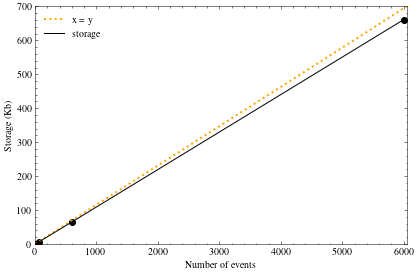

In [9]:
storage_values = np.array([789,6789,67275,677481,6893487])
storage_values_kb = storage_values // 1024
print (storage_values_kb[:-1])

events_number = np.array([6,60,600,6000,60000])

x = events_number[:-1]
y = storage_values_kb[:-1]
x_baseline = np.linspace(0,6050)
y_baseline = np.linspace(0,700)


plt.plot(x_baseline, y_baseline, ':', linewidth=2, color='orange')
plt.legend(['x = y'])

plt.plot(x,y)
plt.scatter(x,y)
plt.legend(['x = y', "storage"],loc ="upper left")

plt.xlabel("Number of events")
plt.ylabel("Storage (Kb)")
plt.xlim(0, 6050)
plt.ylim(0,700)


plt.savefig('../test-results/plots/dummy-baseline-storage.pdf', dpi=300,bbox_inches='tight')
plt.savefig('../test-results/plots/dummy-baseline-storage.png', dpi=300,bbox_inches='tight')
plt.tight_layout()

plt.show()





        events  Infrastructure Setup  Emit Local Transactions  \
0     6 events               1397.53                     0.47   
1    60 events               1387.93                     2.20   
2   600 events               1388.33                    13.03   
3  6000 events               1392.20                   116.97   

   Poll Transaction Receipts  Create CC-Tx  Create CC-Model  
0                    3030.27          0.67            83.51  
1                    3068.97          1.27            87.20  
2                    3163.47          7.53            98.21  
3                    3459.37         26.50           265.88  
((0.19215686274509805, 0.5098039215686274, 0.7411764705882353), (0.4196078431372549, 0.6823529411764706, 0.8392156862745098), (0.6196078431372549, 0.792156862745098, 0.8823529411764706), (0.7764705882352941, 0.8588235294117647, 0.9372549019607843), (0.9019607843137255, 0.3333333333333333, 0.050980392156862744), (0.9921568627450981, 0.5529411764705883, 0.23529411

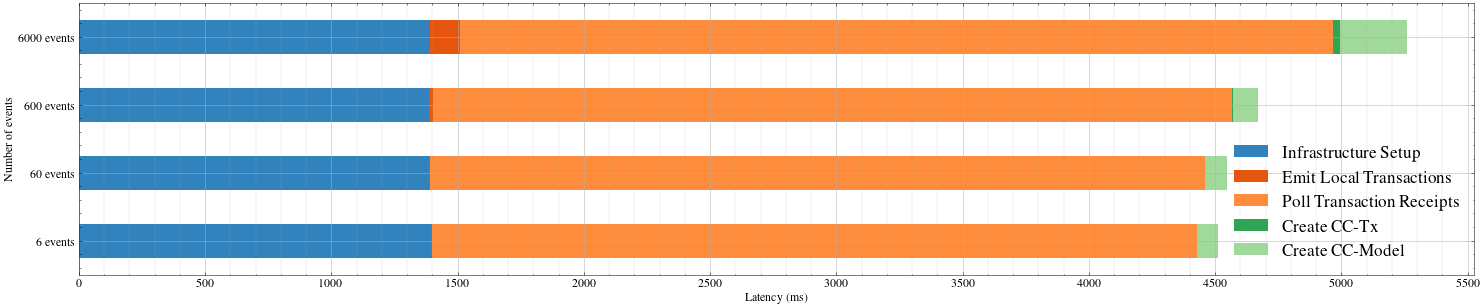

In [11]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
customScale = np.arange(0,6000,500)
df = pd.DataFrame([
                  ['6 events', 
                reduced_metric_dict['EVAL-testFile-SETUP-INFRA']['mean'], 
                reduced_metric_dict['EVAL-testFile-SEND-MESSAGES']['mean'], 
                reduced_metric_dict['EVAL-testFile-POLL']['mean'],
                reduced_metric_dict['EVAL-testFile-AGGREGATE-CCTX']['mean'],
                reduced_metric_dict['EVAL-ccModel-DUMMY']['mean']
                ], 

                  ['60 events', 
                reduced_metric_dict_60['EVAL-testFile-SETUP-INFRA']['mean'], 
                reduced_metric_dict_60['EVAL-testFile-SEND-MESSAGES']['mean'], 
                reduced_metric_dict_60['EVAL-testFile-POLL']['mean'],
                reduced_metric_dict_60['EVAL-testFile-AGGREGATE-CCTX']['mean'],
                reduced_metric_dict_60['EVAL-ccModel-DUMMY']['mean']
                ], 

                  ['600 events', 
                reduced_metric_dict_600['EVAL-testFile-SETUP-INFRA']['mean'], 
                reduced_metric_dict_600['EVAL-testFile-SEND-MESSAGES']['mean'], 
                reduced_metric_dict_600['EVAL-testFile-POLL']['mean'],
                reduced_metric_dict_600['EVAL-testFile-AGGREGATE-CCTX']['mean'],
                reduced_metric_dict_600['EVAL-ccModel-DUMMY']['mean']
                ], 

                  ['6000 events', 
                reduced_metric_dict_6000['EVAL-testFile-SETUP-INFRA']['mean'], 
                reduced_metric_dict_6000['EVAL-testFile-SEND-MESSAGES']['mean'], 
                reduced_metric_dict_6000['EVAL-testFile-POLL']['mean'],
                reduced_metric_dict_6000['EVAL-testFile-AGGREGATE-CCTX']['mean'],
                reduced_metric_dict_6000['EVAL-ccModel-DUMMY']['mean']
                ]
                   
                   ],
                  columns=[
                        'events', 
                        mapper['EVAL-testFile-SETUP-INFRA'], 
                        mapper['EVAL-testFile-SEND-MESSAGES'], 
                        mapper['EVAL-testFile-POLL'],
                        mapper['EVAL-testFile-AGGREGATE-CCTX'],
                        mapper['EVAL-ccModel-DUMMY']
                        ])
# view data
print(df)
  
textwidth = 3.31314
aspect_ratio = 6/8
scale = 1.0
width = textwidth * scale
height = width * aspect_ratio
plt.rc('font', size=12) 

colors = plt.cm.get_cmap('tab20c')
print(colors.colors)
cmap = ListedColormap([colors.colors[0],colors.colors[4],colors.colors[5],colors.colors[8],colors.colors[10]])
print(cmap)
# plot data in stack manner of bar type
ax = df.plot(
      x='events', 
      xlabel="Number of events", 
      kind='barh', subplots=False, stacked=True, colormap=cmap,
      figsize= [25,5],
      grid= True,
      fontsize=12,
      xticks=customScale,
      ylabel="latency",
      title='')
ax.legend(fancybox=True, framealpha=1, fontsize='x-large', loc= 'lower right')
ax.set_xlabel(xlabel='Latency (ms)')
#ax.legend(loc='lower right',facecolor="white")
ax.xaxis.grid(True, which='minor', linestyle='--', linewidth=0.25)

fig = ax.get_figure()

fig.savefig('../test-results/plots/dummy-baseline-all-events.pdf', dpi=300, bbox_inches='tight')
fig.savefig('../test-results/plots/dummy-baseline-all-events.png', dpi=300, bbox_inches='tight')